In [4]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Data parsing
## This section reads a json file exported from the CorText manager

In [9]:
graph_dict = json.load(open('data/networks/maps_export_format/json/network.json'))

nodes_att = graph_dict['nodes']['1'].keys() #random node to copy the attributes
edges_att = graph_dict['edges']['1'].keys() #random edge to copy the attributes
print(nodes_att)

dict_keys(['weight', 'color', 'period', 'community', 'shape', 'size', 'category', 'label', 'in-degree', 'betweeness', 'community_orphan', 'cluster_universal_index', 'cluster_label', 'a', 'b', 'g', 'level', 'cluster_index', 'r', 'out-degree', 'y', 'x'])


# Graph construction
## This section creates the graph, filters nodes, and prepares the graph to be drawn

In [ ]:
# font sizes
min_font_size = 20
max_font_size = 40

g = nx.DiGraph()

#Add nodes and attributes
for node, att in graph_dict['nodes'].items():
    g.add_node(node, **att)
#Connects nodes
for edge, att in graph_dict['edges'].items():
    g.add_edge(str(att['source']), str(att['dest']), **att)

#cluster index:
cluster_idx = set(nx.get_node_attributes(g,'cluster_universal_index').values())
#cluster names:
cluster_name = set(nx.get_node_attributes(g,'cluster_label').values())

#creating dict of positions, it uses position resulting from clustering algorithm (see CorText)
pos = {key:[att['x'], att['y']] for key, att in dict(g.nodes.data()).items()}

#rotate 90 degrees
# pos = {node:list(rotate((0,0),(coords[0],coords[1]), 90)) for node, coords in pos.items()}

#size, uses co-ocurrences as criterion
size = [att['weight'] for key, att in dict(g.nodes.data()).items()]
#normalising size
size_norm = 10*np.array(size)/np.amin(size)
# colors = {key:tuple(att['color']) for key, att in dict(g.nodes.data()).items()}
colors = [tuple(att['color']) for key, att in dict(g.nodes.data()).items()]
#node_label :
labels = {key:att['label'] for key, att in dict(g.nodes.data()).items()}

In [14]:
#all terms in the graph
all_labels = {_label_dict[0]:_label_dict[1] for _label_dict, _size in zip(labels.items(), size)}
all_labels

{'1': 'carbon footprint',
 '2': 'energy consumption',
 '3': 'chain network design',
 '4': 'process management',
 '5': 'natural gas',
 '6': 'mixed integer',
 '7': 'risk mitigation',
 '8': 'agricultural production',
 '9': 'critical success factors',
 '10': 'product life cycle',
 '11': 'environmental uncertainty',
 '12': 'big data',
 '13': 'environmental sustainability',
 '14': 'decision support system',
 '15': 'optimal solution',
 '16': 'food chain',
 '17': 'case study',
 '18': 'empirical study',
 '19': 'conceptual model',
 '20': 'extensive literature review',
 '21': 'Sustainable Development Goals',
 '22': 'linear programming model',
 '23': 'production systems',
 '24': 'energy sources',
 '25': 'management system',
 '26': 'real case study',
 '27': 'chain risk management',
 '28': 'logistics service',
 '29': 'decision makers',
 '30': 'product design',
 '31': 'food waste',
 '32': 'management strategies',
 '33': 'European Union',
 '34': 'managerial insights',
 '35': 'numerical example',
 '36'

In [15]:
#Only some labels are plotted to fit A4 size and be readible
# selected labels: >3000 co-occurrences
threshold = 3000
selected_labels = {_label_dict[0]:_label_dict[1] for _label_dict, _size in zip(labels.items(), size) if _size > threshold}

In [16]:
# It can be noted that some labels correspond to terms not discarded by CorText algorithm (e.g.,'purpose of this paper', 'Research limitations/implications' ).
selected_labels

{'3': 'chain network design',
 '6': 'mixed integer',
 '17': 'case study',
 '29': 'decision makers',
 '40': 'integer linear programming',
 '44': 'total cost',
 '45': 'life cycle assessment',
 '50': 'chain risk',
 '53': 'carbon emissions',
 '64': 'supplier selection',
 '67': 'chain network',
 '71': 'network design',
 '101': 'sensitivity analysis',
 '104': 'purpose of this paper',
 '105': 'literature review',
 '108': 'decision making',
 '109': 'chain management',
 '118': 'risk management',
 '125': 'reverse logistics',
 '126': 'proposed model',
 '127': 'environmental impacts',
 '131': 'optimization model',
 '148': 'Practical implications',
 '155': 'criteria decision',
 '164': 'life cycle',
 '171': 'genetic algorithm',
 '191': 'Research limitations/implications'}

In [17]:
# Irrelevant labels are discarded, and relevant labels included
keys_to_remove = ['104','191','29','71','44','148']
labels_to_add =['climate change', 'food security', 'CO2 emissions',
                'decision support', 'order allocation','chain disruptions','mitigation strategies',
                'Circular economy','COVID-19 pandemic', 'Triple bottom line',
                'new products', 'product design','chain performance', 'business performance',
                'Sustainable supplier selection', 'natural disasters', 'risk assessment']

for key in keys_to_remove:
    selected_labels.pop(key)
labels_to_add_dict = {node:label for label in labels_to_add for node, _label in labels.items() if _label ==label}
selected_labels.update(labels_to_add_dict)

#builds size based on a threshold, for manually added label, size = minimum size
selected_labels_size = {_label_dict[0]:_size for _label_dict, _size in zip(labels.items(), size) if _size > threshold}

# Plot
## This section plots the figure

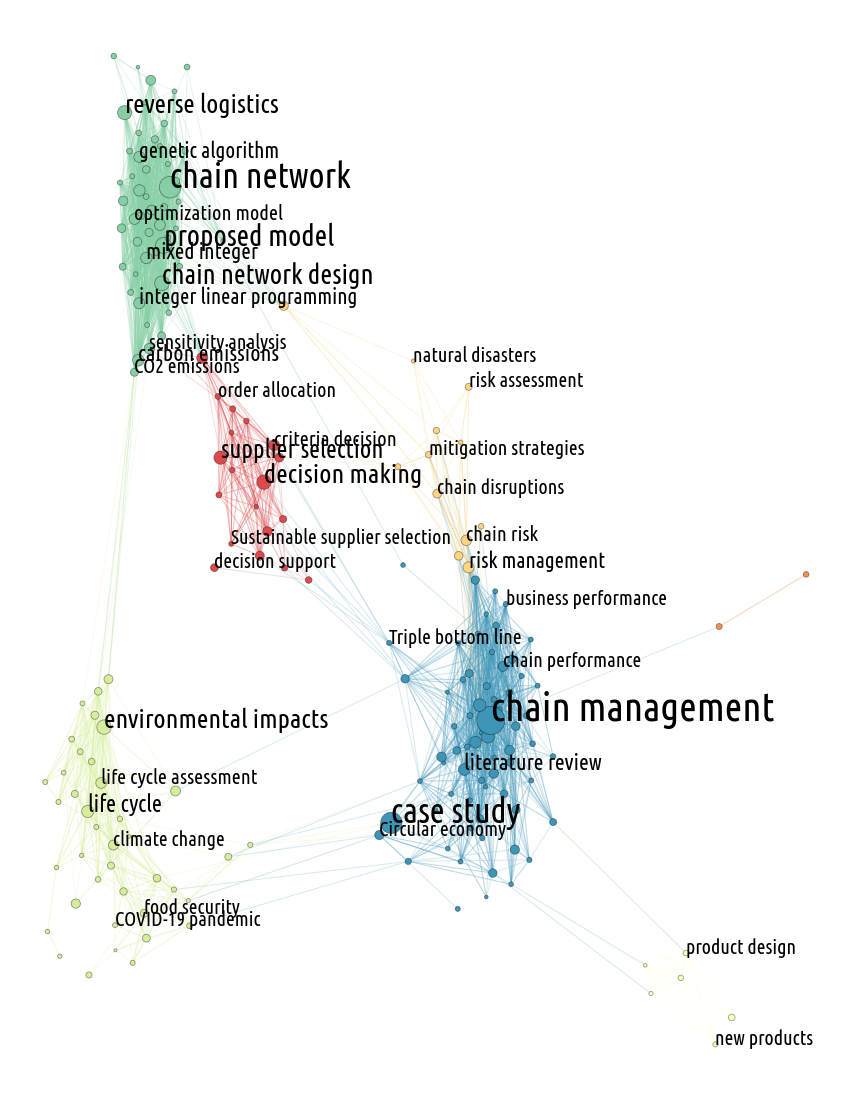

In [18]:
fig = plt.figure(figsize=(15,20))
#draw nodes
nx.draw_networkx_nodes(g, pos=pos, node_color=colors, node_size = size_norm,
                       edgecolors=[0,0,0,0.4], linewidths=0.8)

#draw labels
size_log = np.log(list(selected_labels_size.values())) #using log to change range
font_difference = max_font_size - min_font_size  #expected difference in fonts between biggest and smallest node
factor = font_difference / (np.amax(size_log) - np.amin(size_log))  # 15 / (max - min)
font_normalised = min_font_size + size_log * factor - np.amin(size_log * factor)
font_size_dict = {node:size for node, size in zip(selected_labels_size.keys(), font_normalised)}
font_size_to_add ={_label:min_font_size for _label in labels_to_add_dict}
font_size_dict.update(font_size_to_add)

for node in selected_labels.keys():
    nx.draw_networkx_labels(g, pos=pos, labels ={node:selected_labels[node]}, font_family='Ubuntu Condensed',
                            font_size=font_size_dict[node], horizontalalignment='left',
                            verticalalignment='baseline')

#Draw edges based on colors
for edge in g.edges():
    #edge is tuple (u,v)
    nx.draw_networkx_edges(g, pos = pos, edgelist=[edge], alpha=0.2, arrows=False, edge_color= g.nodes[edge[1]]['color'])
# nx.draw_networkx(g, pos=pos, labels = labels, node_color=colors, arrows=False, node_size = size_norm, with_labels=False)
plt.axis('off')
plt.savefig('figures/network_articles.png')
plt.show()


